In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
df = pd.read_csv('dataset_cleaned.csv')
df


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113995,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113996,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113997,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,0,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


# Chọn ra các đặc trưng âm thanh có ảnh hưởng đến việc mô tả một bài hát.

## Các cột được sử dụng gồm:

- danceability: Mức độ dễ nhảy của bài hát

- energy: Năng lượng của âm nhạc

- loudness: Độ to trung bình

- speechiness: Mức độ chứa lời nói

- acousticness: Độ “acoustic” (tự nhiên, không điện tử)

- instrumentalness: Mức độ nhạc cụ

- liveness: Mức độ trình diễn trực tiếp

- valence: Cảm xúc tích cực của bài hát

- tempo: Tốc độ nhịp (BPM)

In [2]:
# Chuẩn hóa dữ liệu
features = ['danceability','energy','loudness','speechiness',
            'acousticness','instrumentalness','liveness','valence','tempo']

X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

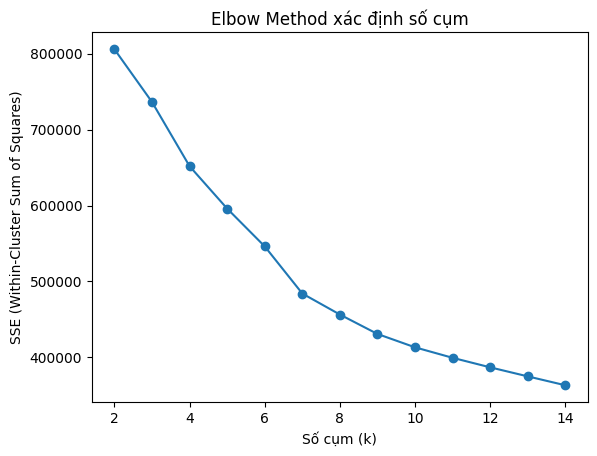

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Xác định số cụm bằng Elbow method
sse = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 15), sse, marker='o')
plt.xlabel('Số cụm (k)')
plt.ylabel('SSE (Within-Cluster Sum of Squares)')
plt.title('Elbow Method xác định số cụm')
plt.show()

# Giả sử chọn k=10
kmeans = KMeans(n_clusters=10, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


# Nhận xét từ biểu đồ

## Quan sát biểu đồ trên:

- SSE giảm mạnh từ k = 2 → k = 6 ( SSE là Tổng bình phương sai số trong cụm )

- Sau k ≈ 7 hoặc 8, đường cong bắt đầu phẳng dần

- Suy ra số cụm hợp lý nhất là khoảng k = 7 hoặc k = 8.
Đây là điểm cân bằng giữa độ chính xác (SSE thấp) và độ đơn giản của mô hình (ít cụm hơn).

## Kết luận

Dựa trên Elbow Method, ta chọn số cụm tối ưu là k = 7 (hoặc 8)
→ Đây là giá trị giúp mô hình K-Means phân cụm các bài hát hiệu quả nhất, phản ánh được sự khác biệt giữa các nhóm âm nhạc mà không làm mô hình phức tạp quá mức.

In [4]:
cluster_summary = df.groupby('cluster')[features].mean()
print(cluster_summary)

         danceability    energy   loudness  speechiness  acousticness  \
cluster                                                                 
0            0.532576  0.737949  -6.131577     0.060749      0.101489   
1            0.347272  0.169132 -21.410083     0.050584      0.863537   
2            0.656415  0.499648  -9.206762     0.057153      0.609016   
3            0.586186  0.744668  -8.417147     0.069462      0.104189   
4            0.707915  0.775588  -5.780823     0.065171      0.136171   
5            0.455611  0.818590  -5.210688     0.085575      0.102969   
6            0.709022  0.666880  -7.086342     0.319381      0.262438   
7            0.520148  0.757981  -7.017548     0.081520      0.284369   
8            0.560060  0.694973 -11.331495     0.880655      0.775966   
9            0.465186  0.307178 -11.834821     0.043953      0.750219   

         instrumentalness  liveness   valence       tempo  
cluster                                                    
0  

#### Bảng kết quả (cluster_summary) cung cấp giá trị trung bình của 11 đặc trưng (ví dụ: danceability, energy, loudness, valence, tempo,...) cho mỗi cụm. Các giá trị trung bình này đóng vai trò là "chân dung" đại diện cho tính chất của các bản ghi thuộc cụm đó.
| **Cụm** | **Đặc trưng Nổi bật (Giá trị Cao nhất/Thấp nhất)** | **Mô tả Cụm Tiêu biểu** |
|:--------:|:----------------------------------------------------|:--------------------------|
| **Cụm 1** | acousticness cao nhất (0.863), loudness thấp nhất (-21.4) | Nhạc Acoustic Thư Giãn/Yên tĩnh. (Độ lớn rất nhỏ, ít nhạc cụ điện tử). |
| **Cụm 3** | instrumentalness cao nhất (0.797) | Nhạc Hoàn toàn Không Lời (Instrumental). |
| **Cụm 5** | valence cao nhất (0.737), tempo cao nhất (163.6), speechiness cao (0.319) | Nhạc Nhanh, Vui vẻ, Tích cực (Party/Dance). (Tốc độ và mức độ vui vẻ cực cao). |
| **Cụm 7** | liveness cao nhất (0.760) | Nhạc Live/Trực tiếp. |
| **Cụm 9** | energy thấp nhất (0.307), danceability thấp nhất (0.465) | Nhạc Thư Giãn Sâu/Ambient. (Năng lượng và khả năng nhảy múa thấp). |


#### Kết quả cluster_summary cho thấy thuật toán phân cụm đã hoạt động hiệu quả, tạo ra các nhóm có đặc tính phân biệt rõ ràng và có ý nghĩa thực tế. Bảng tóm tắt này là cơ sở vững chắc để mô tả chi tiết các phân khúc dữ liệu (ví dụ: phân khúc người nghe nhạc, phân khúc thể loại bài hát) và hỗ trợ các phân tích hoặc ứng dụng tiếp theo (ví dụ: xây dựng hệ thống gợi ý).

In [14]:
# Hàm đề xuất bài hát dựa trên cụm
from sklearn.metrics.pairwise import cosine_similarity
def recommend_songs(song_name, n_recommendations=5):
    song = df[df['track_name'].str.lower() == song_name.lower()]
    if song.empty:
        return "Không tìm thấy bài hát!"
    
    cluster = song.iloc[0]['cluster']
    same_cluster = df[df['cluster'] == cluster].copy()   
    
    song_features = X_scaled[df.index[df['track_name'] == song.iloc[0]['track_name']][0]].reshape(1, -1)
    cluster_features = X_scaled[same_cluster.index]
    similarities = cosine_similarity(song_features, cluster_features).flatten()
    
    same_cluster['similarity'] = similarities
    recs = same_cluster.sort_values(by='similarity', ascending=False)[1:n_recommendations+1]
    return recs[['track_name', 'artists', 'track_genre', 'similarity']]


In [ ]:
# Ví dụ 1 sử dụng hàm đề xuất
recommendations = recommend_songs('Hold On', n_recommendations=7)
print(recommendations)

                      track_name               artists track_genre  similarity
954                      Hold On      Chord Overstreet    acoustic    0.999534
70452                         分裂              Jay Chou    mandopop    0.979378
54102                        Run                 Kyson         idm    0.978062
54150                        Run                 Kyson         idm    0.978062
38544                 Tid tröste            Mando Diao      garage    0.976922
112301  Ölüm Aklımı Çelmek Üzere  Şanışer;Sezgin Alkan     turkish    0.976541
34817             Follow The Sun           Xavier Rudd        folk    0.973347


In [16]:
# Ví dụ 2 sử dụng hàm đề xuất
recommendations = recommend_songs('Friends', n_recommendations=7)
print(recommendations)

                      track_name          artists track_genre  similarity
100087                Bolso Gris    Los Caligaris         ska    0.986236
2789                  Bolso Gris    Los Caligaris    alt-rock    0.986236
60904                        催眠術        QUEEN BEE     j-dance    0.982902
35794                    Bye Bye  Alemão Do Forró       forro    0.982203
936           I Am So Mad at You              AJJ    acoustic    0.980611
66765   Click Your Troubles Away     Miss Melodee        kids    0.978864
31863              me & ur ghost        blackbear     electro    0.978145
